In [1]:
import ATARI.utils.hdf5 as h5io
from matplotlib.pyplot import *
import numpy as np
import pandas as pd
import importlib
import os
from copy import copy
from ATARI.sammy_interface import sammy_classes, sammy_functions, template_creator

from ATARI.models.particle_pair import Particle_Pair
from ATARI.models.experimental_model import Experimental_Model


In [2]:
%matplotlib widget

# Define generative models

Neutron induced reaction measurements using the time-of-flight method can be modelled using 3 primary categories:
1. A reaction model, represented here in ATARI the Particle_Pair class
2. An experimental model, represented here in ATARI by the Experimental_Model class
3. A reduction model, represented in ATARI by a Reduction_Model protocol

These three models attempt to describe everything that is happenning in one of these experiments. 
Traditionally, these models are used to analyze experimental data. 
The Syndat module of the ATARI code uses these models in a generative manner, producing statistical samples of experimental data.

The Generative_Model class is a container for the above three models that will be used to generate data.
This class can be instantiated with defaults, or each of the respective models can be supplied individually.
The following code snippet shows how these models can be created and manipulated from the defaults in the Generative Model container.

In [3]:
# # take default values and inspect each

# generative_model_1 = Generative_Model()

# print("Particle Pair Model:\n")
# print(generative_model_1.particle_pair)

# print()
# print("Experimental Model Sammy Inputs:")
# print(generative_model_1.experimental_model.sammy_inputs)

# print()
# print("Experimental Model Sammy Inputs Altered:")
# generative_model_1.experimental_model.sammy_inputs = {'alphanumeric': ["BROADENING IS NOT WANTED"],
#                                                       'ResFunc' : ''}
# print(generative_model_1.experimental_model.sammy_inputs)


# print()
# print("Reduction Model:")
# print(generative_model_1._reduction_model)

## Reaction Model: Particle Pair class
Each of the 3 models can also be created outside and then added to the Generative Model container.
These ATARI classes have additional functionality if you want to work with them at this lower level.
The following code snippet demonstrates some of these capabilities.

In [4]:
Ta_pair = Particle_Pair(isotope = "Ta181",
                        resonance_ladder = pd.DataFrame(),
                        formalism = "XCT",
                        energy_range = [200,250],
                        ac = 8.127,
                        M = 180.94803,
                        I = 3,
                        l_max = 2
)

# print quant number map up to l_max
Ta_pair.map_quantum_numbers(print_out=True)

# add spin group information for both s-wave resonances
Ta_pair.add_spin_group(Jpi='3.0',
                       J_ID=1,
                       D_avg=8.79,
                       Gn_avg=46.5,
                       Gn_dof=1,
                       Gg_avg=64.0,
                       Gg_dof=1000)
Ta_pair.add_spin_group(Jpi='4.0',
                       J_ID=2,
                       D_avg=4.99,
                       Gn_avg=35.5,
                       Gn_dof=1,
                       Gg_avg=64.0,
                       Gg_dof=1000)

print()
print("Interrogate spin group attribute:")
print(Ta_pair.spin_groups['3.0'])


print()
print("Resonance ladder sampled from resonance statistics:")
print(Ta_pair.sample_resonance_ladder())

Spin group data for all parity
(Jpi, #Chs, l-waves)
(-4.5, 1, [1])
(-3.5, 2, [1, 1])
(-2.5, 2, [1, 1])
(-1.5, 1, [1])
(0.5, 1, [2])
(1.5, 2, [2, 2])
(2.5, 3, [0, 2, 2])
(3.5, 3, [0, 2, 2])
(4.5, 2, [2, 2])
(5.5, 1, [2])

Interrogate spin group attribute:
{'J_ID': 1, '<D>': 8.79, '<Gn>': 46.5, 'n_dof': 1, '<Gg>': 64.0, 'g_dof': 1000, 'D01': 0.9943384234177864, 'D99': 21.284662911191237, 'Gn01': 0.007304585392801135, 'Gn99': 308.52269194748646, 'Gg01': 57.53039660349525, 'Gg99': 70.84601563854191, 'Gt01': 57.53770118888805, 'Gt99': 379.3687075860284}

Resonance ladder sampled from resonance statistics:
             E         Gg         Gn1    J J_ID varyE varyGg varyGn1
0   206.599057  68.893429   53.570745  3.0    1   0.0    0.0     0.0
1   223.973511  67.297201      1.3556  3.0    1   0.0    0.0     0.0
2   242.845535  65.317575   43.653579  3.0    1   0.0    0.0     0.0
3    248.04466  64.271643  387.733425  3.0    1   0.0    0.0     0.0
4   208.123748   65.66196   37.191724  4.0    2

## Experimental Model class & Sammy

This class's primary purpose is to hold relevant experimental information used in calculating experimentally corrected resonance models with SAMMY.
The ATARI code come with a sammy-interface module that wraps around the sammy code. For more details on this interface, see the user example notebook. 
Before the Experimental_Model can be passed to syndat, the user must define the template parameter to be a path to a sammy input template. 

The sammy interface has a module for creating template input files from these generative models. 
The idea is that you make the template, inspect it manually, then give it to the experimental model class to be used with syndat

In [5]:

trans12mm_gen_exp = Experimental_Model(title = "T12mm", 
                                 reaction = "transmission", 
                                 energy_range = [200, 250], 
                                 template = None, 
                                 energy_grid = None, 
                                 n = (0.067166, 0.0), 
                                 FP = (35.185, 0.0), 
                                 t0 = (3326.0, 0.0), 
                                 burst = (10, 1.0), 
                                 temp = (300, 0.0), 
                                 channel_widths = { 
                                     "maxE": [250],
                                     "chw": [100.0],
                                     "dchw": [0.8]
                                 }
)

cap12mm_gen_exp = Experimental_Model(title = "Y12mm", 
                                 reaction = "capture", 
                                 energy_range = [200, 250], 
                                 template = None, 
                                 energy_grid = None, 
                                 n = (0.067166, 0.0), 
                                 FP = (35.185, 0.0), 
                                 t0 = (3326.0, 0.0), 
                                 burst = (10, 1.0), 
                                 temp = (300, 0.0), 
                                 channel_widths = { 
                                     "maxE": [250],
                                     "chw": [100.0],
                                     "dchw": [0.8]
                                 }
)


sammy_rto = sammy_classes.SammyRunTimeOptions('/Users/noahwalton/gitlab/sammy/sammy/build/bin/sammy',
                                        {"Print":   True,
                                         "bayes":   False,
                                         "keep_runDIR": False,
                                         "sammy_runDIR": "sammy_runDIR_1"
                                         })

template_creator.make_input_template(
    'template_T.inp', Ta_pair, trans12mm_gen_exp, sammy_rto)

template_creator.make_input_template(
    'template_Y.inp', Ta_pair, cap12mm_gen_exp, sammy_rto)


cap12mm_gen_exp.template = os.path.realpath('template_Y.inp')

trans12mm_gen_exp.template = os.path.realpath('template_T.inp')

In [6]:
cap12mm_gen_exp.sammy_inputs


{'alphanumeric': ['USE MULTIPLE SCATTERING',
  'INFINITE SLAB',
  'NORMALIZE AS YIELD Rather than cross section',
  'BROADENING IS WANTED',
  'DO NOT SHIFT RPI RESOLUTION'],
 'ResFunc': 'RPI C'}

## Measurement models

Syndat needs both a generative and reductive measurement model. 
The generative model is considered 'true' and is used to generate statistical samples of raw experimental observables. 
These raw observables, however, are not used directly in evaluations, rather they are put through a data reduction model to get an object like experimental transmission or capture yield. 
By defining both a generative and reductive measurment model, Syndat can be used to investigate the impact of incorrectly specified measurement models/parameters used in the data reduction process.



In [7]:
from ATARI.models.measurement_models.transmission_rpi import Transmission_RPI
from ATARI.models.measurement_models.capture_yield_rpi import Capture_Yield_RPI
from ATARI.syndat.syndat_model import Syndat_Model
from ATARI.syndat.control import syndatOPT

trans12mm_gen_meas = Transmission_RPI()
trans12mm_red_meas = Transmission_RPI()

cap12mm_gen_meas = Capture_Yield_RPI()
cap12mm_red_meas = Capture_Yield_RPI()

## Sampling from Syndat

The syndat class contains all necessary model information. 
It also takes a syndat options class which can be instantiated with default settings.
Once you've constructed your syndat model, the sample method can be used to draw any number of samples.
This method takes either a sammyRTO arguement or a pw_true arguement. 
If pw_true is given, this will be taken as the true experimental function around with measurement data will be sampled. 
Usually the user will provide a sammyRTO instead which will allow the true experimental function to be reconstructed by sammy.
This also allows new resonance ladders to be sampled each time.


In [8]:
synOPT = syndatOPT()
synOPT.calculate_covariance = True
synOPT 

calculate_covariance: True
explicit_covariance: False
sampleRES: True
sampleTNCS: True
sampleTURP: True
sample_counting_noise: True
save_raw_data: False
smoothTNCS: False

In [9]:
cap12mm_gen_meas.model_parameters.neutron_spectrum

In [10]:
# synT.sample(sammyRTO=sammy_rto, num_samples=5)

syndat_trans12mm = Syndat_Model(trans12mm_gen_exp,
                            trans12mm_gen_meas,
                            trans12mm_red_meas,
                            options = synOPT)

syndat_trans12mm.sample(Ta_pair, 
                    sammyRTO=sammy_rto,
                    num_samples=1)

syndat_cap12mm = Syndat_Model(cap12mm_gen_exp,
                            cap12mm_gen_meas,
                            cap12mm_red_meas,
                            options = synOPT)

syndat_cap12mm.sample(Ta_pair, 
                    sammyRTO=sammy_rto,
                    num_samples=1)

In [11]:
print(syndat_trans12mm.covariance_data.keys())
print(syndat_cap12mm.covariance_data.keys())

dict_keys(['Cov_sys', 'Jac_sys', 'diag_stat'])
dict_keys([])


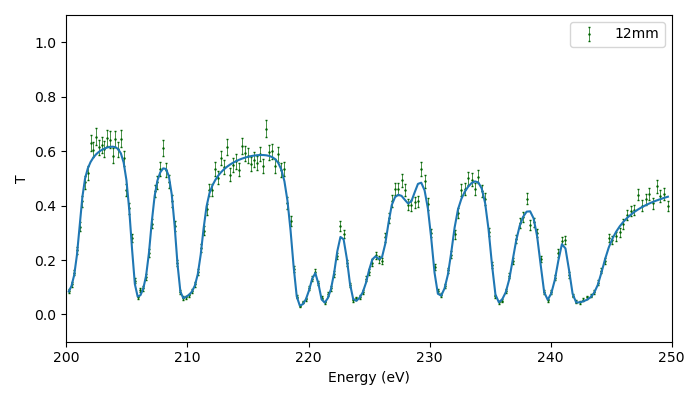

In [10]:
data = syndat_trans12mm.datasets[0].pw_reduced

### Plot 
figure(figsize=(7,4))
errorbar(data.E, data.exp, yerr=data.exp_unc, zorder=0,
                                        fmt='.', color='darkgreen', linewidth=0.5, markersize=1.5, capsize=1, label='12mm')

plot(data.E, data.true)
ylabel("T")

### make it pretty
xlim([200,250])
ylim([-0.1,1.1])
legend()
xlabel('Energy (eV)')
tight_layout()

# TODO
- Rename modules
- implement to_hdf5
- implement IDC for sammy YW scheme
- develop syndat_model_correlations input
- implement generative model parameter sampling for experimental model (into sammy, generate template each sample)

## Syndat control module for multiple datasets

The above example show how to build and sample from a complete syndat model for one experimental dataset. 
The Syndat Control Module can be used to build and sample from several syndat models at once.
This module also allows correlations between datasets to be modelled.

<!-- 1. sample resonance ladder
For all models/datasets:
2. sample correlated parameters
3. sample uncorrelated parameters
4. generate raw data 
5. reduce raw data -->

In [ ]:
# trans1mm_gen_exp = Experimental_Model(title = "T1mm", 
#                                  reaction = "transmission", 
#                                  energy_range = [200, 250], 
#                                  template = None, 
#                                  energy_grid = None, 
#                                  n = (0.00566,0.0), 
#                                  FP = (100.14,0.0), 
#                                  t0 = (3326.0, 0.0), 
#                                  burst = (8, 0.0), 
#                                  temp = (294.2610, 0.0), 
#                                  channel_widths = { 
#                                      "maxE": [250],
#                                      "chw": [100.0],
#                                      "dchw": [0.8]
#                                  }
# )

# trans1mm_gen_meas = Transmission_RPI()
# trans1mm_red_meas = Transmission_RPI()

# syndat_trans1mm = Syndat_Model(trans1mm_gen_exp,
#                             trans1mm_gen_meas,
#                             trans1mm_red_meas)

### Now, put each of these syndat models into the control module class

Options can be redefined here, each respective syndat model will take on the new options.

In [ ]:
# from ATARI.syndat.control import Syndat_Control

# syndat = Syndat_Control(particle_pair= Ta_pair,
#                         syndat_models= [syndat_trans12mm, syndat_trans1mm],
#                         model_correlations=None,
#                         options=synOPT
#                         )

In [ ]:

# ### Plot 
# fig, axes = subplots(2,1, figsize=(8,6), sharex=True)

# ### Trans
# axes[0].errorbar(data.E, data.exp, yerr=data.exp_unc, zorder=0,
#                                         fmt='.', color='darkgreen', linewidth=0.5, markersize=1.5, capsize=1, label='12mm')

# axes[0].plot(data.E, data.true)
# axes[0].set_ylabel("T")

# # ### Capture
# # axes[1].errorbar(synY.data.E, synY.data.exp, yerr=synY.data.exp_unc, zorder=0, 
# #                                         fmt='.', color='indigo', linewidth=0.5, markersize=1.5, capsize=1, label='1mm')
# # axes[1].plot(synY.data.E, synY.data.true)

# # axes[1].set_ylabel(r"$Y_{\gamma}$")

# ### make it pretty
# for ax in axes:
#     ax.set_xlim([200,250])
#     ax.set_ylim([-0.1,1.1])
#     ax.legend()

# fig.supxlabel('Energy (eV)')
# fig.tight_layout()

In [ ]:
### capture data info
# 'n'         :   (0.067166,            0),
# 'FP'        :   (35.185,              0),
# 't0'        :   (3.326,               0),
# 'bw'        :   (0.0064,              0),

# exp_model_Y = experimental_model("Y1mm", "capture", [200,250],
                               
#                                     parameters={
#                                         'FP':(100.14,0.01),
#                                         't0':(2.0, 0.0)
#                                         } ,

#                                     channel_width_info={
#                                           "maxE": [500], 
#                                           "chw": [100.0],
#                                           "dchw": [0.8]
#                                           }
#                                                                   )

# exp_model_Y


class model_correlation:
    def __set_name__(self, owner, name):
        self._name = name

    def __get__(self, instance, owner) -> tuple:
        return instance.__dict__[self._name]

    def __set__(self, instance, value):
        # instance.__dict__[self._name] = date.fromisoformat(value)
        if isinstance(value, tuple):
            if len(value) != 2:
                raise ValueError("Tuple for parameter must be (value, uncertainty)")
        else:
            raise ValueError("Must supply tuple for parameter value and uncertainty")
        instance.__dict__[self._name] = value


class model_correlation:
    def __init__(self):
        pass

    self._enable = [True, True, True]
    self._model_type = 'measurement'
    self._parameter_key = 'ks'
    self._parameter = (0.0563, 0.02402339737495515)

    def sample_true_parameter(self):
        



SyntaxError: incomplete input (1636470085.py, line 52)

# Investigate Noise Distribution : need to update this

In [ ]:

# jb_df = pd.read_csv("/Users/noahwalton/research_local/resonance_fitting/synthetic_data/Ta181/JB_sol/JB_reduction_data.csv", index_col='Unnamed: 0')
# jb_cov = np.load("/Users/noahwalton/research_local/resonance_fitting/synthetic_data/Ta181/JB_sol/JB_cov.npy")
# jb_sys = np.load("/Users/noahwalton/research_local/resonance_fitting/synthetic_data/Ta181/JB_sol/JB_syst.npy")
# jb_stat = np.load("/Users/noahwalton/research_local/resonance_fitting/synthetic_data/Ta181/JB_sol/JB_stat.npy")
# jb_df['bw'] = jb_df.bw*1e-6
# realdat = jb_df.loc[(jb_df.e < 120) & (jb_df.e > 3)]


# transdat12 = sammy_functions.readlst(
#     "/Users/noahwalton/research_local/resonance_fitting/ATARI_workspace/measurement_data/trans-Ta-12mm.dat")
# exptrans12 = Experimental_Model(title="trans12mm",
#                                 reaction="transmission",
#                                 energy_range=[2, 120],

#                                 sammy_inputs={
#                                     'alphanumeric':   ["BROADENING IS WANTED"],
#                                     'ResFunc':   "ORRES"
#                                 },

#                                 n= (0.067166, 0.0),
#                                 FP= (35.185, 0.0),
#                                 burst= (8, 0.0),
#                                 temp= (294.2610, 0.0),

#                                 channel_width_info={
#                                     "maxE": [270],
#                                     "chw": [102.7],
#                                     "dchw": [0.8]
#                                 },

#                                 additional_resfunc_lines=["WATER 0004 5.6822000 -0.54425 0.07733000", "WATER      0.5000000  0.05000 0.00700000", "LITHI 000  -1.000000  -1.0000 6.00000000",
#                                                           "LITHI      0.1000000  0.10000 0.60000000", "LITHI      166.87839 -28.7093 1.260690", "LITHI      0.2574580 -0.06871 0.004915"]
#                                 )

# transdat12 = transdat12[(transdat12.E < max(exptrans12.energy_range)) & (
#     transdat12.E > min(exptrans12.energy_range))]

In [ ]:
# from syndat.old.control import syndat
# from ATARI.models.Y_reduction_rpi import yield_rpi
# from ATARI.models.T_reduction_rpi import transmission_rpi

# fit from jeff


# sammyRTO = sammy_classes.SammyRunTimeOptions('/Users/noahwalton/gitlab/sammy/sammy/build/bin/sammy',
#                                              {"Print":   True,
#                                               "bayes":   False,
#                                               "keep_runDIR": False
#                                               })

# matnum = 7328
# jeff_file = "/Users/noahwalton/research_local/data/JEFF33_endf6/73-Ta-181g.jeff33"
# jeff_parameters = sammy_functions.get_endf_parameters(
#     jeff_file, matnum, sammyRTO)

# jeff_parameters = jeff_parameters[(
#     jeff_parameters.E < 120) & (jeff_parameters.E > 2)]
# jeff_parameters["varyGn1"] = np.ones(len(jeff_parameters))*1
# jeff_parameters["varyGg"] = np.ones(len(jeff_parameters))*1
# jeff_parameters["varyE"] = np.ones(len(jeff_parameters))*1


# datasets = [transdat12]
# experiments = [exptrans12]
# # templates = [os.path.realpath('template_T.inp')]
# templates = []
# for data, exp in zip(datasets, experiments):
#     filepath = f'template_{exp.title}'
#     # templates are already made and edited!
#     template_creator.make_input_template(filepath, model, exp, rto)
#     templates.append(os.path.realpath(filepath))

# sammyINPyw = sammy_classes.SammyInputDataYW(
#     particle_pair=Ta_pair,
#     model=model,
#     resonance_ladder=jeff_parameters,

#     datasets=datasets,
#     templates=templates,
#     experiments=experiments,

#     max_steps=20,
#     iterations=2,
#     step_threshold=0.01,
#     autoelim_threshold=None,

#     LS=False,
#     LevMar=True,
#     LevMarV=1.5,
#     # LevMarVd=5,
#     initial_parameter_uncertainty=0.1
# )

# sammyRTO.bayes = True
# sammyRTO.keep_runDIR = True
# sammyOUT = sammy_functions.run_sammy_YW(sammyINPyw, sammyRTO)

### Randomly sampled resonances ladders
Usually produces a similar signal to noise ratio unless the resonance ladder is drastically different, could look at average over many repetitions? Want to match 

In [ ]:

# sammyRTO = sammy_classes.SammyRunTimeOptions('/Users/noahwalton/gitlab/sammy/sammy/build/bin/sammy',
#                                              {"Print":   True,
#                                               "bayes":   False,
#                                               "keep_runDIR": False
#                                               })


# datasets = [transdat12]
# experiments = [exptrans12]
# # templates = [os.path.realpath('template_T.inp')]
# templates = []
# for data, exp in zip(datasets, experiments):
#     filepath = f'template_{exp.title}'
#     template_creator.make_input_template(filepath, Ta_pair, exp, rto)
#     templates.append(os.path.realpath(filepath))

# res = Ta_pair.sample_resonance_ladder([2,120])

# sammyINPyw = sammy_classes.SammyInputDataYW(
#     particle_pair=Ta_pair,
#     resonance_ladder=res,

#     datasets=datasets,
#     templates=templates,
#     experiments=experiments,
# )

# sammyOUT = sammy_functions.run_sammy_YW(sammyINPyw, sammyRTO)

In [ ]:

# true_df = copy(sammyOUT.pw[0])
# assert (isinstance(true_df, pd.DataFrame))
# true_df = true_df[["E", "theo_trans"]]
# true_df.rename(columns={"theo_trans": "true"}, inplace=True)


# generation_T1 = transmission_rpi(reduction_parameters={'trigo':   (9758727,             0),
#                                                        'trigs':   (18476117,            0)}
#                                                        )
# reduction_T1 = transmission_rpi(reduction_parameters={'trigo':   (9758727,             0),
#                                                       'trigs':   (18476117,            0)}
#                                                       )

# synT = syndat(options={})
# synT.(true_df, generation_T1, reduction_T1, exp_model_T)

In [ ]:
# figure()
# plot(transdat12.E, transdat12.exp, 'k.', markersize=1)
# plot(synT.data.E, synT.data.exp, 'b.', markersize=1)
# # plot(synT.data.E, synT.data.true, 'b', markersize=1)
# ylim([-0.1,1])

In [ ]:

# freq = np.fft.fftfreq(len(synT.data.tof), synT.data.tof[1] - synT.data.tof[0])

# Y = np.fft.fft(transdat12.exp)

# Ysyn = np.fft.fft(synT.data.exp)
# # P_signal = np.abs(Ysyn)**2
# # P_noise = np.abs(Y[noise_indices])**2
# # SNR = np.sum(P_signal) / np.sum(P_noise)

# figure()
# plot(freq, abs(Y), 'k.')
# plot(freq, abs(Ysyn), 'b.')
# ylim(-0.01, 100)
# xlim(0)

# # xscale('log')
# # yscale('log')